In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [54]:
rpidf = pd.read_csv('../saved_results/pi2.csv') 
frododf_1= pd.read_csv('../saved_results/frodo2.csv')  #1 GPU
frododf_3 = pd.read_csv('../saved_results/frodo3.csv') #2 GPU 
mac_df = pd.read_csv('../saved_results/mac2.csv')

In [55]:
neurons = []
pi_times = []
frodo_times_1 = []
frodo_times_3 = []
mac_times = []

for i in rpidf.values.tolist():
    neurons.append(i[0])
    pi_times.append(i[1])
for i in frododf_1.values.tolist():
        frodo_times_1.append(i[1])
for i in frododf_3.values.tolist():
        frodo_times_3.append(i[1])
for i in mac_df.values.tolist():
        mac_times.append(i[1])

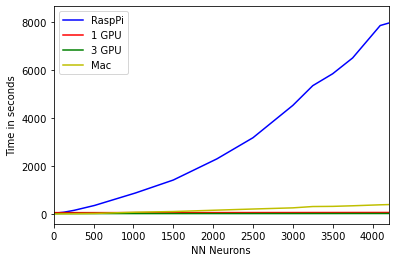

In [56]:
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'y', label='Mac')
plt.legend()
plt.show()

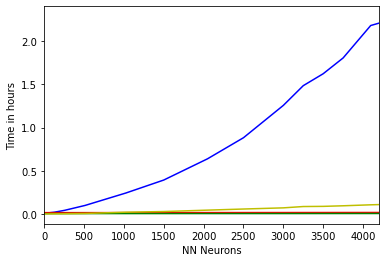

In [58]:
pi_timesh = [t/3600 for t in pi_times]
frodo_times_1h = [t/3600 for t in frodo_times_1]
frodo_times_3h = [t/3600 for t in frodo_times_3]
mac_timesh = [t/3600 for t in mac_times]

plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in hours')
plt.plot(neurons, pi_timesh, 'b')
plt.plot(neurons, frodo_times_1h, 'r')
plt.plot(neurons, frodo_times_3h, 'g')
plt.plot(neurons, mac_timesh, 'y', label='Mac')
plt.show()


In [16]:
## Zoom in


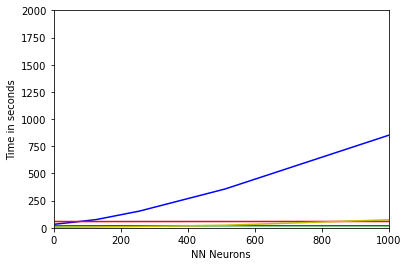

In [59]:
plt.xlim(0,1000)
plt.ylim(0,2000)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons, pi_times, 'b')
plt.plot(neurons, frodo_times_1, 'r')
plt.plot(neurons, frodo_times_3, 'g')
plt.plot(neurons, mac_times, 'y', label='Mac')
plt.show()

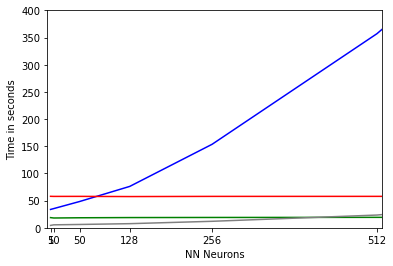

In [64]:
plt.xticks(neurons)
plt.xlim(0,520)
plt.ylim(0,400)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')

plt.plot(neurons, pi_times, 'b')
plt.plot(neurons, frodo_times_1, 'r')
plt.plot(neurons, frodo_times_3, 'g')
plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.show()

In [67]:
def plot(fig):
    fig.plot(neurons, pi_times, 'b', label = 'RaspPi')
    fig.plot(neurons, frodo_times_1, 'r', label = '1 GPU')
    fig.plot(neurons, frodo_times_3, 'g', label = '3 GPU')
    fig.plot(neurons, mac_times, 'gray', label='Mac')
    fig.legend()


In [70]:
fig, axs = plt.subplots(2,2 , figsize=(20,12))
fig.suptitle('Zoom ins')
axs[0,0].set_xlim(0,1000)
axs[0,0].set_ylim(0,2000)

plot(axs[0,0])

plt.xticks(neurons)
axs[0,1].set_xlim(0,520)
axs[0,1].set_ylim(0,400)
#axs[0,1].set_xticks(neurons)
plot(axs[0,1])


axs[1,0].set_xlim(0,130)
axs[1,0].set_ylim(0,150)
plot(axs[1,0])

axs[1,1].set_xlim(0,4200)
plot(axs[1,1])

for ax in axs.flat:
    ax.set(xlabel='Neurons', ylabel='Seconds')
